1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline
from scipy.stats import norm
import scipy as sp

In [2]:
mu = 1
sigma = 0.2
N = 500
#find a mathematical relationship between the two
bin_number = 12
x = np.random.normal(loc = mu, scale = sigma, size = N)

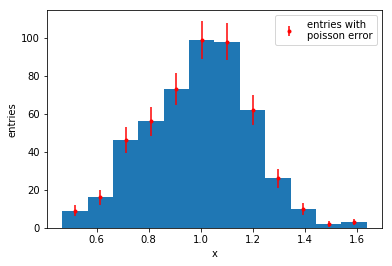

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
#ax.legend(loc='upper left')
ax.set_ylabel('entries')
ax.set_xlabel('x')
n, bins, _ = plt.hist(x, bins = bin_number)
#n, bins, _ = plt.hist(x, bins = bin_number, density = True)
medium_x = (bins[1:] + bins[:-1])/2
sigma_n = np.sqrt(n)
plt.errorbar(medium_x, n, sigma_n, fmt = 'r.', label = 'entries with \npoisson error')
plt.legend(loc = 'upper right')
plt.show()


In [4]:
#print(bins)
print(n)

[ 9. 16. 46. 56. 73. 99. 98. 62. 26. 10.  2.  3.]


In [5]:
A = (bins[-1]-bins[0])/bin_number*n.sum()
print(A)

48.67153491244617


In [6]:
#help(plt.hist)

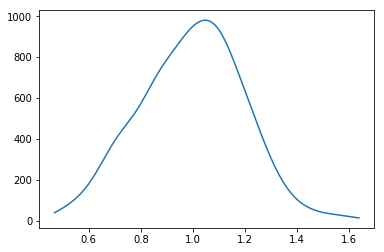

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ax = np.linspace(x.min(), x.max(), num = 200)
gauss = np.zeros((N,200))
for i in range(N):
    gauss[i,:] = norm.pdf(x_ax, loc = x[i], scale = 1.06*x.std()*x.size**(-0.2))
    #ax.plot(x_ax, gauss[i,:], 'b')
#plt.show()
gauss_sum = np.sum(gauss, axis = 0)
plt.plot(x_ax, gauss_sum)


In [8]:
I = sp.integrate.trapz(gauss_sum, dx = (x.max()-x.min())/200)
print(I)

494.9270526703716


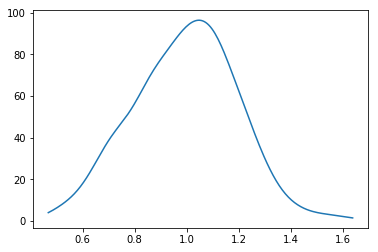

In [9]:
gauss_sum_norm = gauss_sum*A/I
plt.plot(x_ax, gauss_sum_norm)

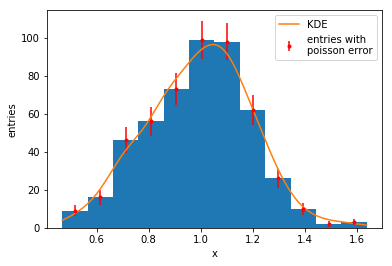

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
#ax.legend(loc='upper left')
ax.set_ylabel('entries')
ax.set_xlabel('x')
n, bins, _ = plt.hist(x, bins = bin_number)
medium_x = (bins[1:] + bins[:-1])/2
sigma_n = np.sqrt(n)
plt.errorbar(medium_x, n, sigma_n, fmt = 'r.', label = 'entries with \npoisson error')
#plt.plot(x_ax, gauss_sum_norm*N/bin_number, label = 'KDE')
plt.plot(x_ax, gauss_sum_norm, label = 'KDE')
plt.legend(loc = 'upper right')
plt.show()

In [11]:
#help(sp.integrate.trapz)
#help(norm.pdf)
#help(plt.subplots)
#help(np.sqrt)
#help(plt.errorbar)
#help(np.random.normal)
#help(plt.hist)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2019-01-05 15:27:07--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2019-01-05 15:27:08--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4b0b13f05f51109a7f68624633.dl.dropboxusercontent.com/cd/0/inline/AY1JSuNzw-XamlfsIq7OOlC3hLorzBb9I35yvZ9Or0FA_KKfqhkiCRil_Z9c__btQcISDmRrak7v5tyLJTJebcifoCpTgpaoHunlcfbcrvcXW3-19W-1z4rLiI3yseLHU3nbnT8VC9B9mXvIi10Y2pW72Wd9g7A7rfsCfhAXtR9yFvCwUSDTfW2DxIB8DOTkcgM/file [following]
--2019-01-05 15:27:08--  https://uc4b0b13f05f51109a7f68624633.dl.dropboxusercontent.com/cd/0/inline/AY1JSuNzw-XamlfsIq7

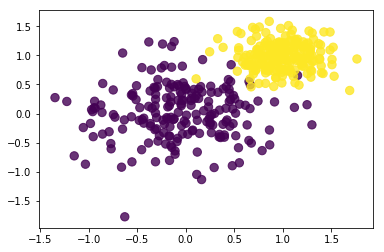

In [12]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


In [13]:
mu1 = [1,0]
sigma1 = [[0.6,0.2],[0.2,0.2]]
n1 = 1000
X1 = np.random.multivariate_normal(mu1, sigma1, n1)

mu2 = [0,1]
sigma2 = [[0.4,0.1],[0.1,0.2]]
n2 = 1000
X2 = np.random.multivariate_normal(mu2, sigma2, n2)

(1000, 3)


/home/nicola/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


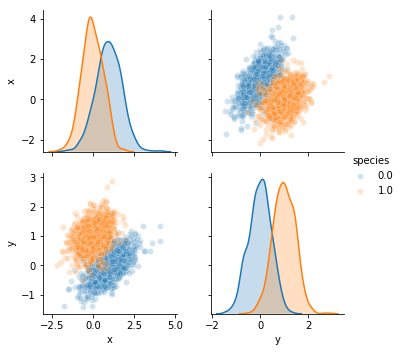

In [14]:
#help(np.concatenate)
import seaborn as sns

X1_label = np.concatenate((X1,np.zeros((n1,1))), axis = 1)
X2_label = np.concatenate((X2,np.zeros((n2,1))+1), axis = 1)

print(X1_label.shape)
X = pd.DataFrame(np.concatenate((X1_label,X2_label)), columns = ['x','y', 'species'])
#X = 

#sns.jointplot(x="x", y="y", data=X)

sns.pairplot(X, hue = 'species', vars = ['x','y'], plot_kws = {'alpha' : 0.2});

In [15]:
#help(sns.pairplot)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [16]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2019-01-05 15:27:10--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2019-01-05 15:27:10--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc380fda6346abca521a9c98db5a.dl.dropboxusercontent.com/cd/0/inline/AY20hqESZ1SVILAJlwv7F-fgSslIQsFq8QY4jYLpHGF24KItgsKlnGNFm78qrHlYMhsmX7yT1QDU03BTyD93OjbUqFSL_j-oKpqK41p4V3TcGB3JNs3gRSJaPLUUZOnNnRuuZHCFJO8WaJiSVGKEVVsyMa5PzJIWuW0ZVzNJXB28-pnms87H0BXE6W3qvS6alDs/file [following]
--2019-01-05 15:27:10--  https://uc380fda6346abca521a9c98db5a.dl.dropboxusercontent.com/cd/0/inline/AY20hqESZ1SVILAJlwv7F-fgSslIQsFq8QY4jYLpHGF24KItgsKlnGNFm78qr

In [17]:
#help(np.load)

In [25]:
v = np.load('residuals_261.npy')
v = v.reshape(1,1)
v = v[0][0]
df = pd.DataFrame.from_dict(v)

In [26]:
df.describe()

,residuals,distances
count,11131.000000,11131.000000
mean,-0.616477,9.771465
std,4.163705,5.877819
min,-160.850000,0.000000
25%,-0.330000,4.400000
50%,-0.110000,9.700000
75%,0.060000,14.900000
max,11.320000,24.900000


In [28]:
df = df[np.abs(df['residuals']) <2]
df.describe()

,residuals,distances
count,10489.000000,10489.000000
mean,-0.121878,9.954824
std,0.439143,5.847142
min,-2.000000,0.000000
25%,-0.280000,4.700000
50%,-0.100000,10.000000
75%,0.070000,15.100000
max,1.992857,24.900000


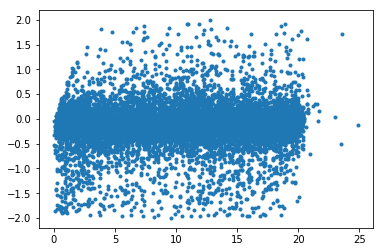

In [35]:
plt.plot(df['distances'], df['residuals'], '.')
plt.show()

* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot


In [46]:
import scipy.stats as stat
b, a, rv, pv, _ = stat.linregress( df['distances'], df['residuals'])

/home/nicola/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


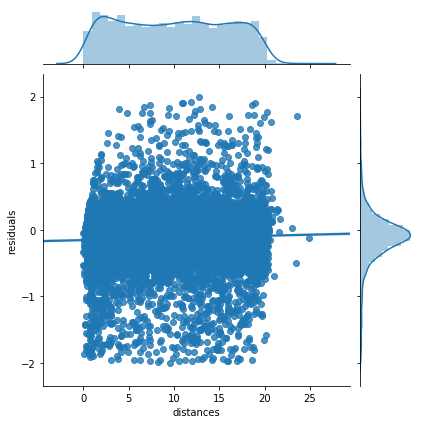

In [47]:
g = sns.jointplot("distances", "residuals", data=df, kind="reg")

In [48]:
#help(sns.jointplot)

In [49]:
df

,residuals,distances
0,1.100000,16.000
1,-1.950000,6.300
8,-0.042857,3.300
9,0.128571,5.300
10,0.085714,15.000
11,-0.130000,9.300
12,-0.090000,10.200
13,0.210000,12.200
14,0.170000,7.900
15,0.042857,4.500


In [50]:
x = np.array([i + 1/2 for i in range(20)])
y_predicted = a + b*x
y_mean = np.zeros(20)
y_err = np.zeros(20)
residuals = df['residuals']
for i in range(20):
    y_mean[i] = residuals[(df['distances'] > i) & (df['distances'] < i+ 1)].mean()
    y_err[i] = residuals[(df['distances'] > i) & (df['distances'] < i+ 1)].std()
    
print(y_mean)
print(y_err)

[-0.24681325 -0.12989732 -0.17463489 -0.16243032 -0.13319177 -0.13942494
 -0.10424032 -0.07879165 -0.10530914 -0.10090854 -0.03311745 -0.0914637
 -0.07868601 -0.13182509 -0.14368135 -0.12177526 -0.13945171 -0.16790314
 -0.12161063 -0.05222069]
[0.48732756 0.42182345 0.4262629  0.40975528 0.38458806 0.39801896
 0.43612876 0.46095775 0.44381378 0.42008083 0.43645245 0.47160631
 0.50159408 0.46371072 0.46224375 0.45553885 0.41060295 0.42074562
 0.40744313 0.37218506]


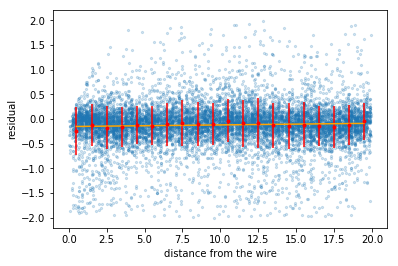

In [64]:
df1 = df[df['distances'] < 20]

plt.errorbar(x, y_mean, yerr = y_err, fmt = 'r.')
plt.plot(x, y_predicted, color = 'orange', linestyle = 'solid')
plt.scatter(df1['distances'], df1['residuals'], s = 5, alpha = 0.2)
plt.xlabel('distance from the wire')
plt.ylabel('residual')
plt.show()

In [124]:
def hist_with_kde(axes, x_in, density = True, **kwargs):
    x = np.array(x_in)
    N = len(x)
    n, bins, _ = axes.hist(x, density = density, color = 'skyblue', **kwargs)
    num_bins = len(bins)
    sampling_number =  num_bins*10
    x_ax = np.linspace(x.min(), x.max(), num = sampling_number) 
    gauss = np.zeros((N, sampling_number))
    for i in range(N):
        gauss[i,:] = norm.pdf(x_ax, loc = x[i], scale = 1.06*x.std()*x.size**(-0.2))
    gauss_sum = np.sum(gauss, axis = 0)
    I = sp.integrate.trapz(gauss_sum, dx = (x.max()-x.min())/sampling_number)
    gauss_sum_norm = gauss_sum/I
    
    if 'orientation' in kwargs and kwargs['orientation'] == 'horizontal':
            # invert x and y
            axes.plot(gauss_sum_norm, x_ax, color = 'black', linewidth = '3', linestyle = 'solid')
    else:
        axes.plot(x_ax, gauss_sum_norm, color = 'black', linewidth = '3', linestyle = 'solid')

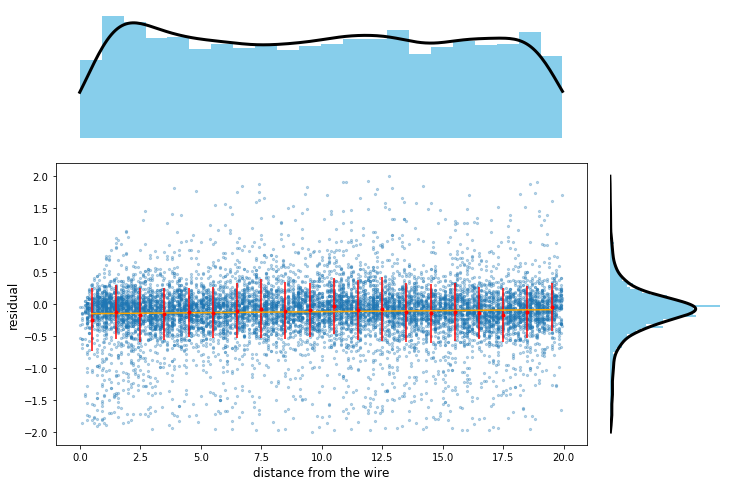

In [131]:
gridsize = (3, 5)
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot2grid(gridsize, (1, 0), colspan=4, rowspan=2)
ax1.scatter(df1['distances'], df1['residuals'], s = 5, alpha = 0.3)
ax1.errorbar(x, y_mean, yerr = y_err, fmt = 'r.')
ax1.plot(x, y_predicted, color = 'orange', linestyle = 'solid')
ax1.set_xlabel('distance from the wire', fontsize = 'large')
ax1.set_ylabel('residual', fontsize = 'large')

ax2 = plt.subplot2grid(gridsize, (0, 0), colspan = 4, rowspan = 1)
#n2, bins2, patches2 = ax2.hist(df1['distances'], bins='auto')
hist_with_kde(ax2, df1['distances'], bins='auto')
ax2.axis('off')

ax3 = plt.subplot2grid(gridsize, (1, 4), colspan = 1, rowspan = 2)
#n3, bins3, patches3 = ax3.hist(df1['residuals'], bins='auto', orientation = 'horizontal')
hist_with_kde(ax3, df1['residuals'], bins='auto', orientation = 'horizontal')
ax3.axis('off')
                      
plt.show()

In [132]:
#help(plt.errorbar)
#help(plt.scatter)
#help(plt.plot)
#help(plt.subplot2grid)
#help(plt.hist)